# Ejemplo de regresión de modelos no lineales
*Ignacio Díaz Blanco, 2023. Universidad de Oviedo*

Aproximación modelos no lineales como combinación lineal de términos no lineales
$$
y = f(x,\theta) \approx a_1 f_1(x) + a_2 f_2(x) + \dots a_n f_n(x)
$$
donde $f$ es una función no lineal desconocida y $f_i$ son términos no lineales que se pueden elegir convenientemente en cada problema, aprovechando el conocimiento disponible. 

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from scipy.signal import square
from scipy.signal import sawtooth

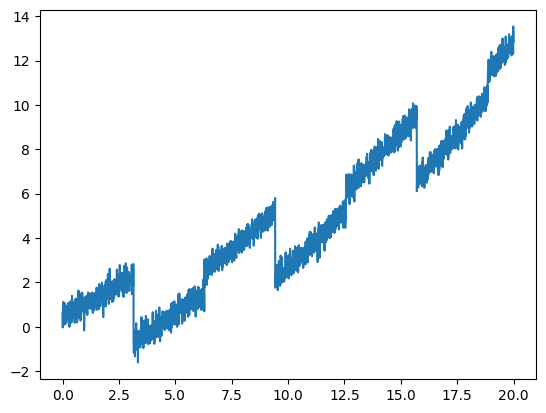

In [2]:
# definimos la función "verdadera" (ground truth)
f = lambda x: square(x) + 0.5*sawtooth(2*x) + 0.2*x + 0.02*x**2

# Número de datos del ejemplo
N = 3000;

# Generamos datos acordes con el modelo polinómico
a3, a2, a1, a0 = 1, -5, 1, 2
epsilon = 0.3*np.random.randn(N);

x = np.linspace(0,20,N);
y = f(x) + epsilon; 

plt.plot(x,y)


Aproximamos nuestra función por una base de funciones no lineales
$$
x,\quad x^2,\quad \sin(x),\quad \cos(x),\quad \sin(2x),\quad \cos(2x),\quad \sin(3x),\quad \cos(3x),\quad \sin(4x),\quad \cos(4x)
$$

In [3]:
# creamos una matriz con los términos no lineales del polinomio
X = np.column_stack((x, x**2, np.sin(x), np.cos(x), np.sin(2*x), np.cos(2*x), np.sin(3*x), np.cos(3*x), np.sin(4*x), np.cos(4*x)))

In [4]:
from sklearn.linear_model import Ridge
modelo = Ridge(alpha=0.0001)

modelo.fit(X,y)

print(f'coeficientes          = {modelo.coef_}')
print(f'término independiente = {modelo.intercept_}')

coeficientes          = [ 0.19801054  0.0200305   1.25778448  0.01401208 -0.32151606  0.01501686
  0.42537212  0.00591745 -0.1581365   0.00394038]
término independiente = 0.018912417967761108


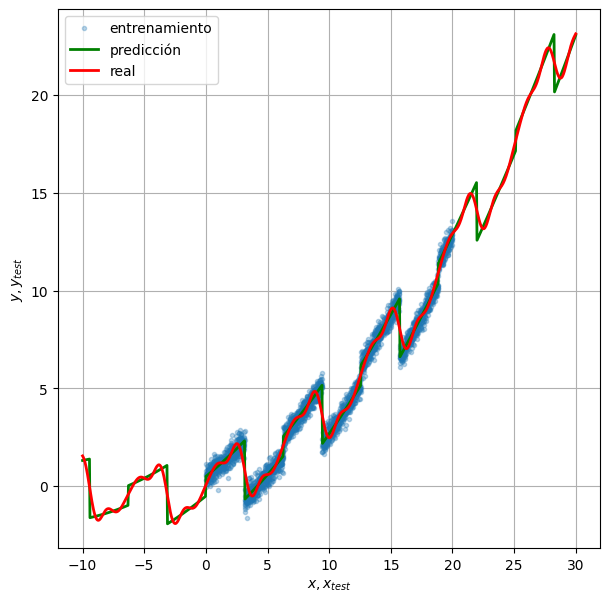

In [5]:
# generamos datos de test nuevos
xtest = np.linspace(-10,30,1000)
ytest = f(xtest)

# construimos la matriz X con los mismos términos no lineales que para el entrenamiento
Xtest = np.column_stack((xtest, xtest**2, np.sin(xtest), np.cos(xtest), np.sin(2*xtest), np.cos(2*xtest), np.sin(3*xtest), np.cos(3*xtest), np.sin(4*xtest), np.cos(4*xtest)))
ypred = modelo.predict(Xtest)

plt.figure(2,figsize=(7,7));
plt.plot(x,y,'.',alpha=0.3);			# datos de entrenamiento
plt.plot(xtest,ytest,'g',linewidth=2);  # modelo ideal
plt.plot(xtest,ypred,'r',linewidth=2);  # predicción 
plt.xlabel('$x, x_{test}$')
plt.ylabel('$y, y_{test}$')
plt.legend(('entrenamiento','predicción','real'))
plt.grid(True)


# LLEGADOS A ESTE PUNTO... PROBAR A CAMBIAR LOS DATOS Y VER QUÉ PASA

<a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/"><img alt="Licencia de Creative Commons" style="border-width:0" src="https://i.creativecommons.org/l/by-sa/4.0/88x31.png" /></a><br /><span xmlns:dct="http://purl.org/dc/terms/" property="dct:title">Ejemplo de Regresión de modelos no lineales</span> by <a xmlns:cc="http://creativecommons.org/ns#" href="http://isa.uniovi.es/~idiaz" property="cc:attributionName" rel="cc:attributionURL">Ignacio Díaz Blanco</a> is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/">Creative Commons Reconocimiento-CompartirIgual 4.0 Internacional License</a>.